# <font color='orange'> Title: Olist-customer satification

## <font color='blue'>  Table of Contents
   ## <font color='blue'>  1. Defining Problem, 2. Metrics, 3. Distribution, 4. Preprocessing, 
   ## <font color='blue'>  5. Correlation, 6. Feature Engineering, 7. Models
    
#### <font color='dodgerblue'> Repository: https://github.com/jakejhc/Team_Project

<img align=middle src="https://i.imgur.com/HRhd2Y0.png" width="850"/>

### <font color='red'>Ecommerce conversion funnels:

### <font color='red'>A. Consideration and Evaluation
### <font color='red'>B. Purchase
### <font color='red'>C. Post-Purchase
### <font color='red'>D. Repeat Purchase



# 1. Defining Problem

### <font color='orange'>Predicting customer satisfaction after a purchase.


# 2. Metrics

### <font color='red'>High Accuracy 

### <font color='red'>Low latency (predict within order completion)

### <font color='red'>Prone to outliers


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Data**

In [2]:
cust_data = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
geo_data =  pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')
order_items =  pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
order_payments =  pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products_data = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
sellers_data = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
product_category = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

# 3. Distributions

## Customer data 

In [4]:
cust_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
cust_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
cust_data.customer_state.describe()

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

Text(0.5, 1.0, 'Customers by State')

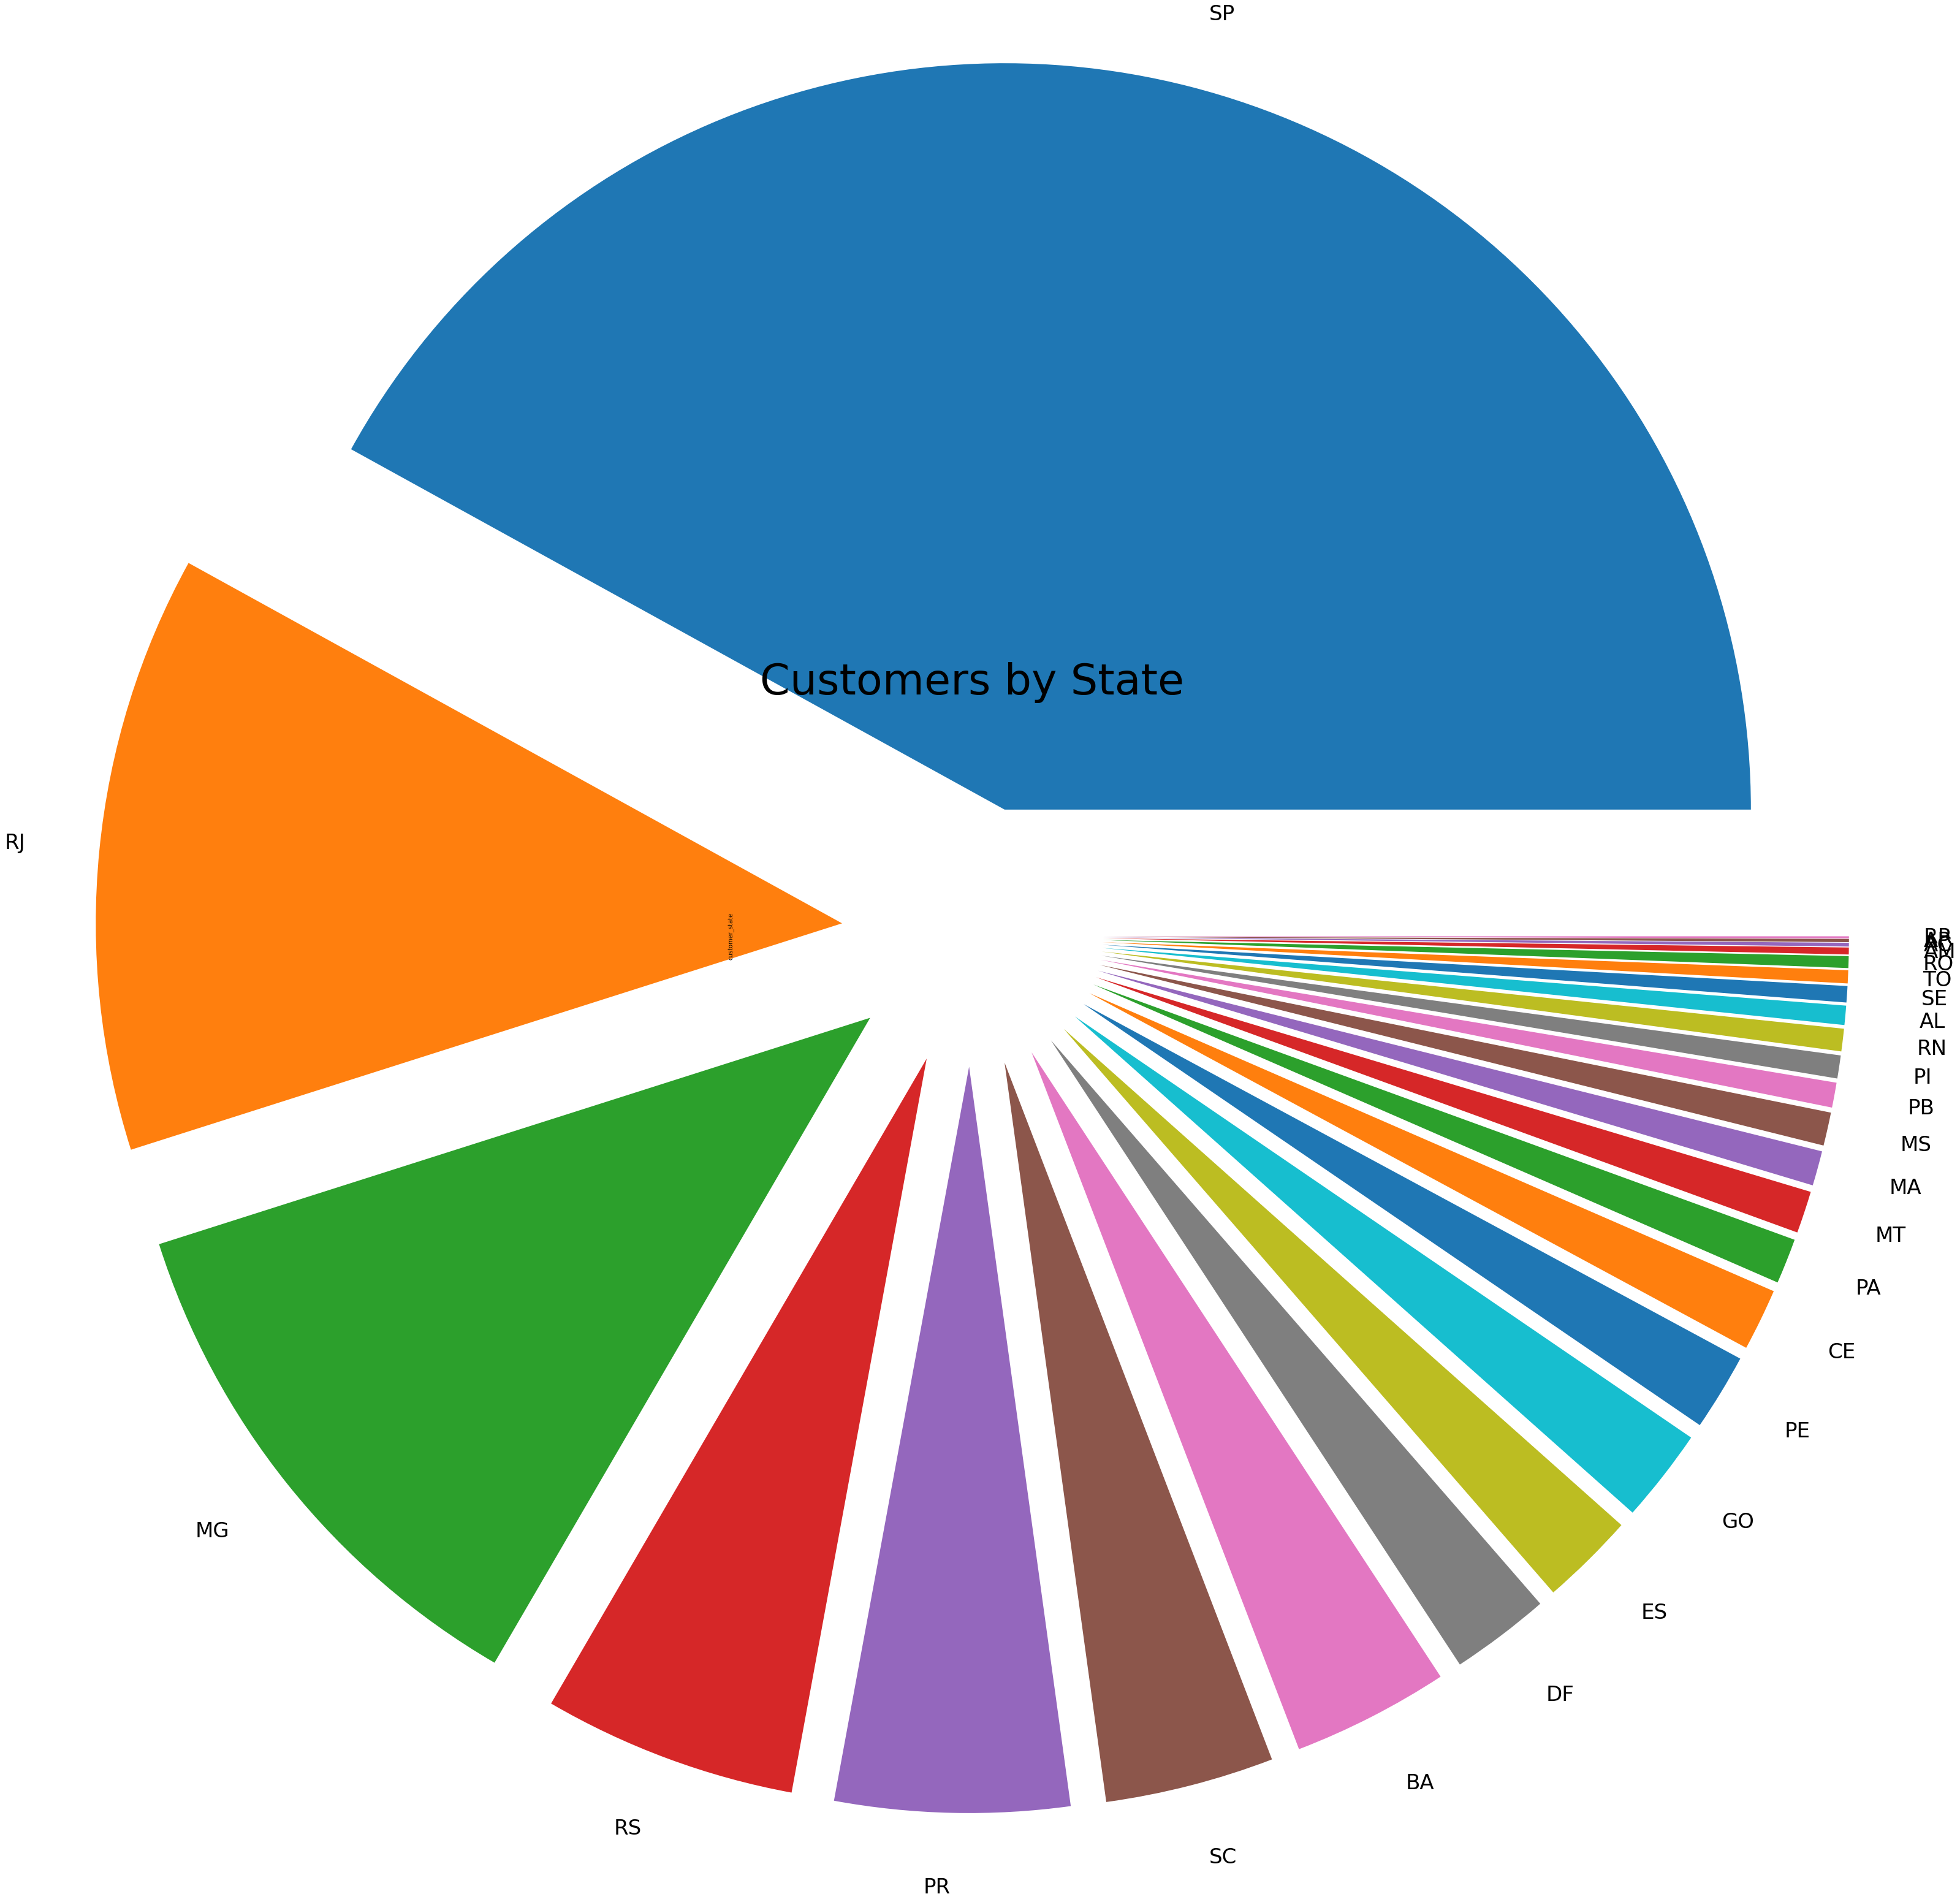

In [7]:

cust_data.customer_state.value_counts().plot(kind='pie',figsize=(14,14),radius=4,fontsize=34,explode=[0.7]*27)
plt.title('Customers by State',fontsize=70)


# Top 10 cities with their value counts


In [8]:
cust_data.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

# Order_item Data 

In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
#checking if any null/NA present in any entry
order_items.isnull().any().any()

False

In [12]:
print('Number of sellers :',order_items.seller_id.unique().shape[0])
print('Number of unique products are : ',order_items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


# Price  

In [13]:
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

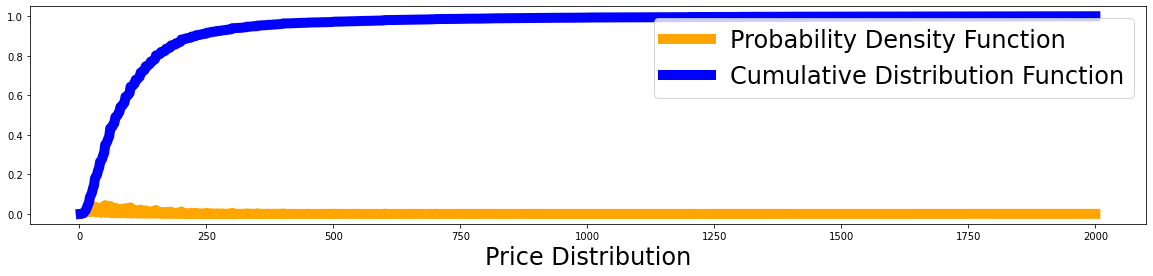

In [22]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
smooth_data = order_items[order_items.price <= 2000]
counts, bin_edges = np.histogram(smooth_data.price, bins=1000, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(20,4))
plt.plot(bin_edges[1:],pdf,color='orange',label='Probability Density Function',lw=10)
plt.plot(bin_edges[1:], cdf,color='blue',label='Cumulative Distribution Function',lw=10)
plt.legend(fontsize=24)

plt.xlabel('Price Distribution',fontsize=24)

plt.show();

# Order_Payments

In [23]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Payment method Feature

Text(0.5, 1.0, 'Majority payment is boleto or "bank ticket".')

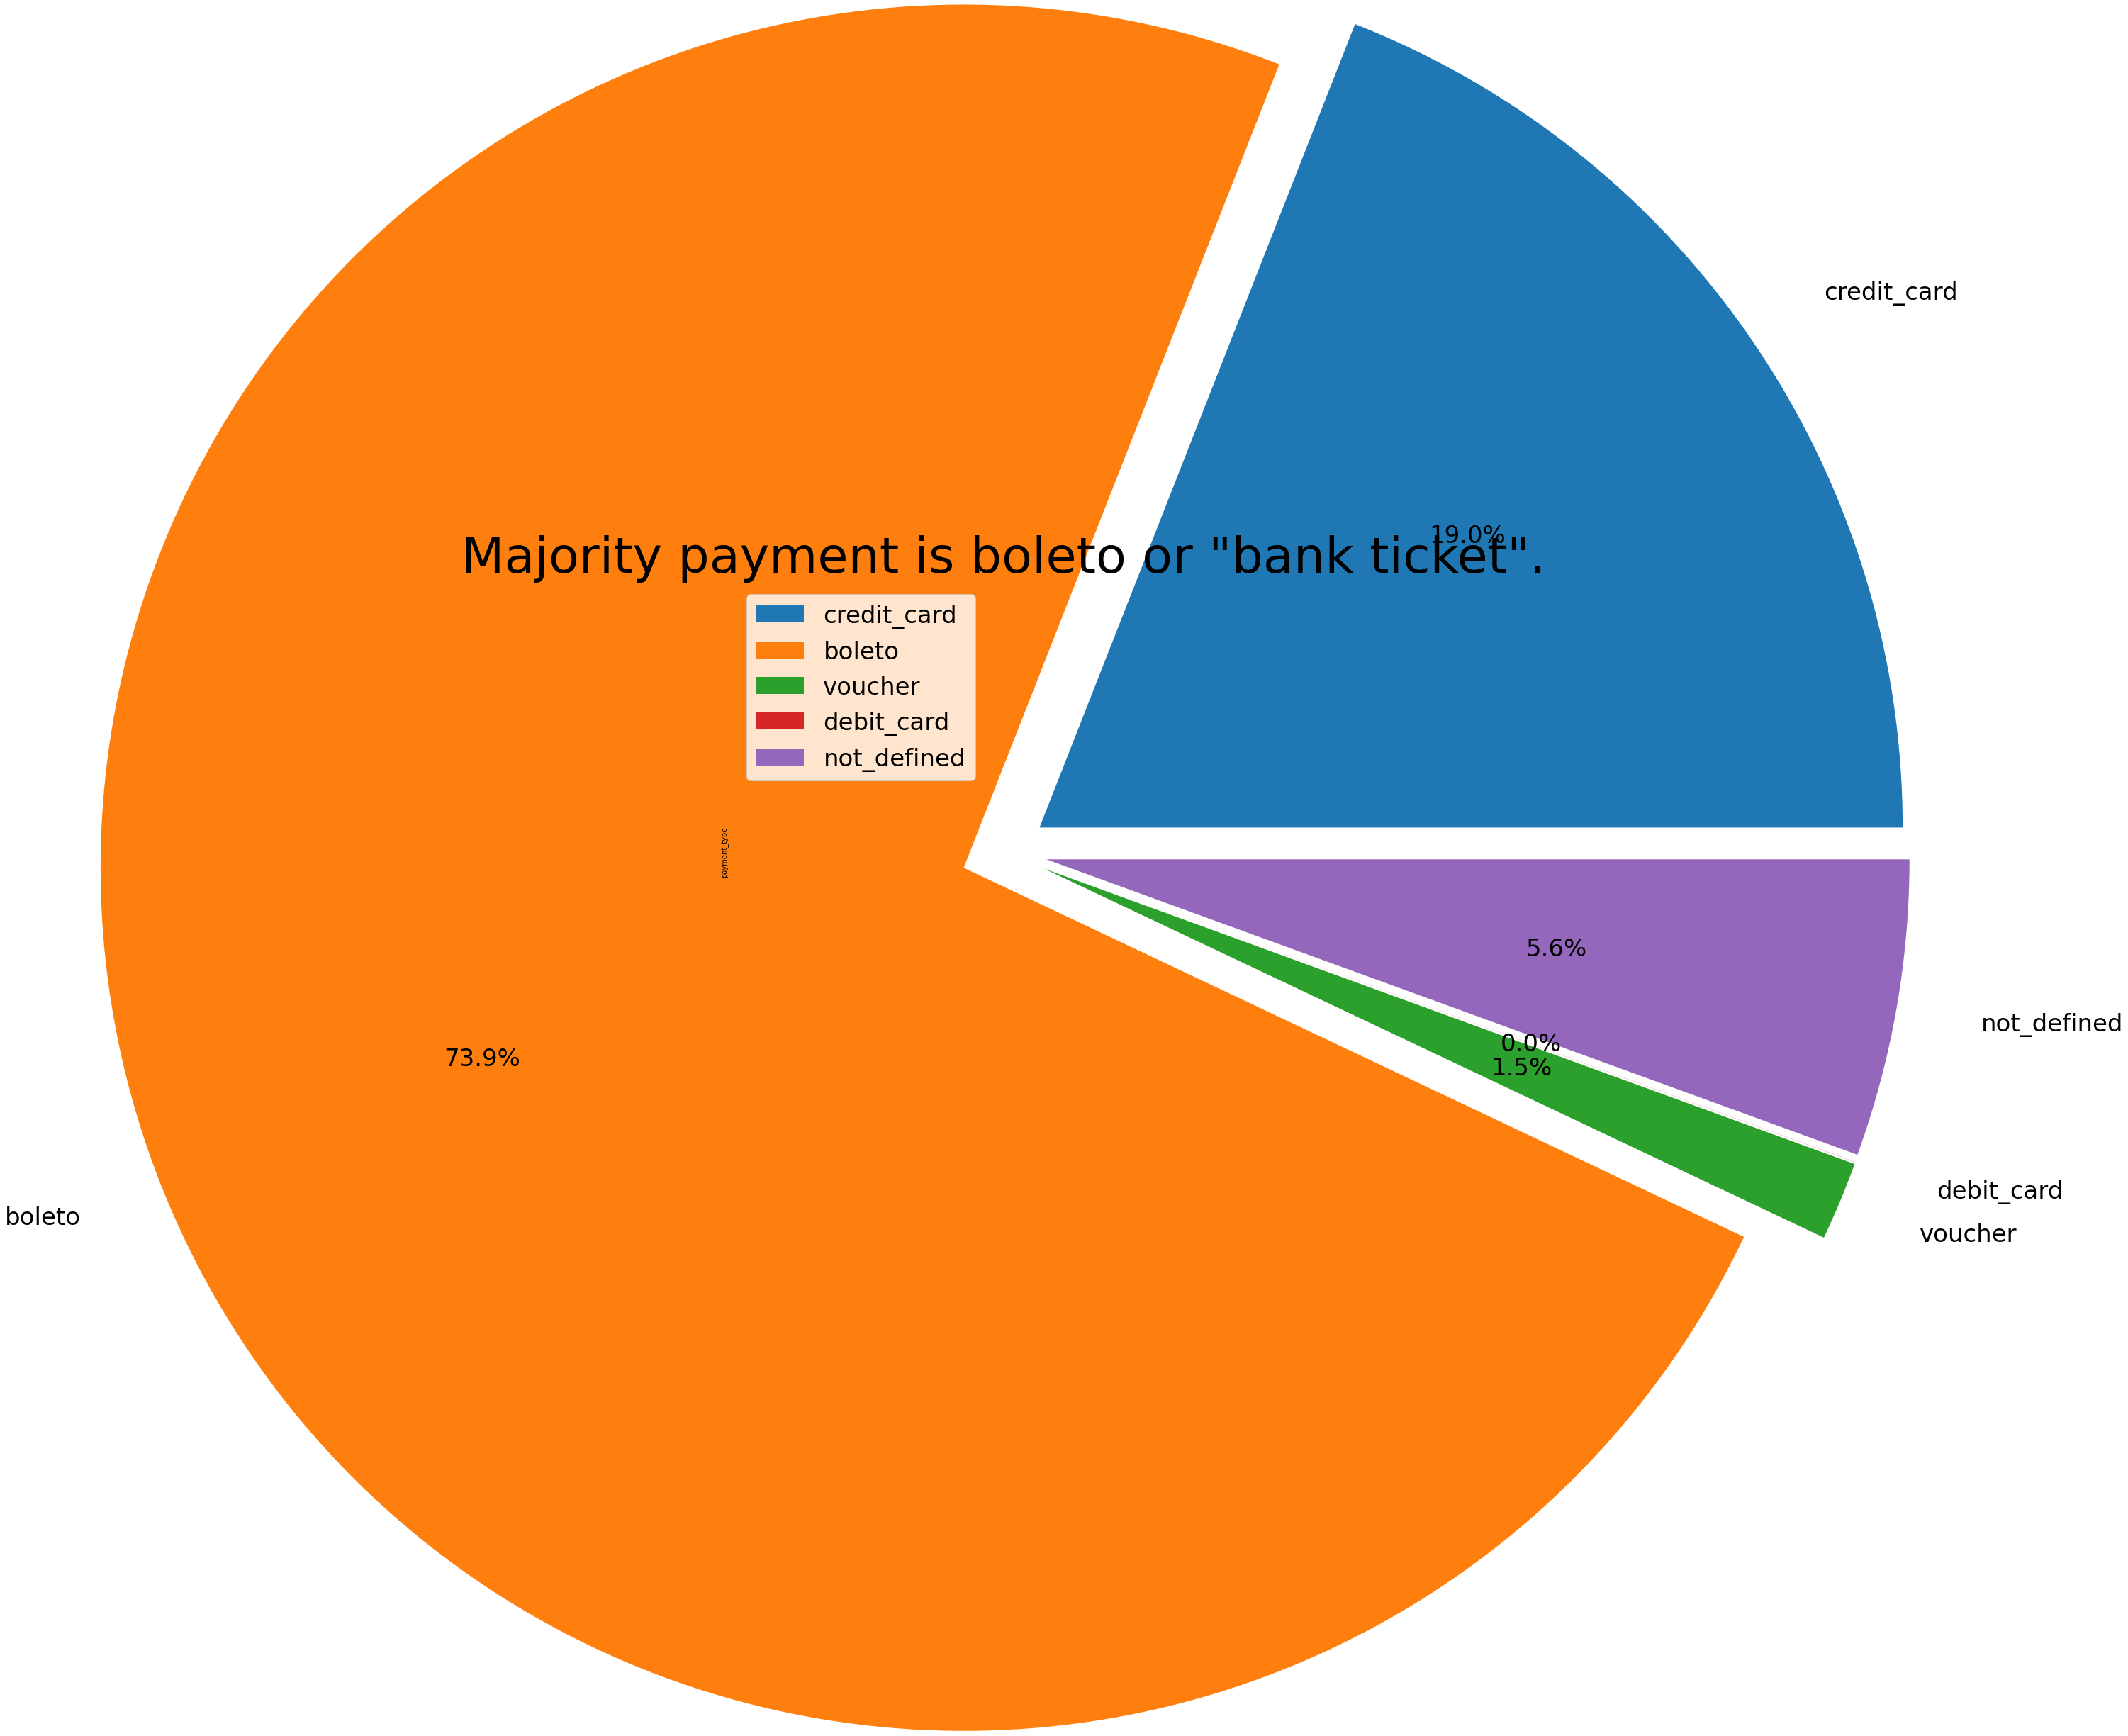

In [24]:
#Most used Payment method for orders
explode = [0.2]*5
order_payments['payment_type'].groupby(order_payments['payment_type']).count().plot(kind='pie',figsize=(14,14),radius=4,fontsize=34,labels=order_payments.payment_type.unique(),autopct='%.1f%%',explode=explode)
plt.legend(fontsize=34)
plt.title('Majority payment is boleto or "bank ticket".',fontsize=70)

# number of installments 


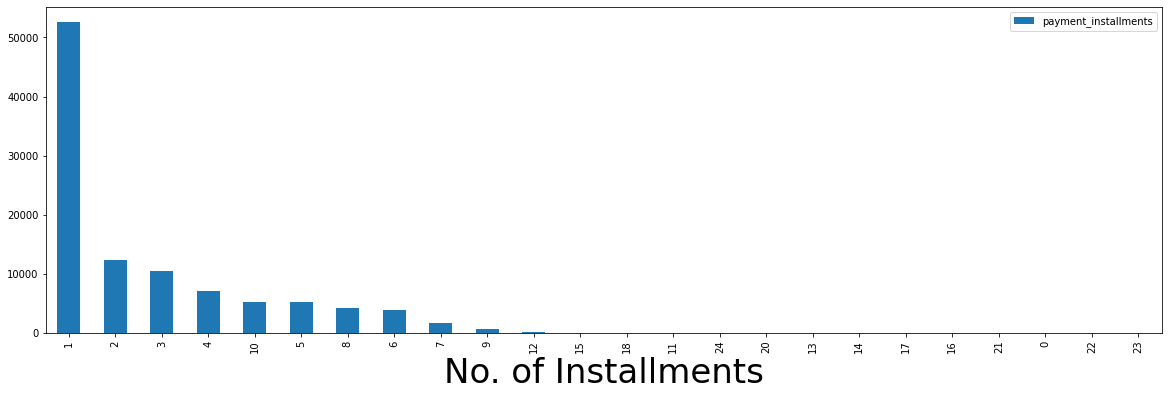

In [25]:
order_payments.payment_installments.value_counts().plot(kind = 'bar',figsize=(20,6))
plt.legend()
plt.xlabel('No. of Installments',fontsize=34)
plt.show()

In [26]:
#checking if any null/NA present in any entry
order_payments.isnull().any().any()

False

In [27]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# pie chart for review_score


Text(0.5, 1.0, 'Review_Score Distribution')

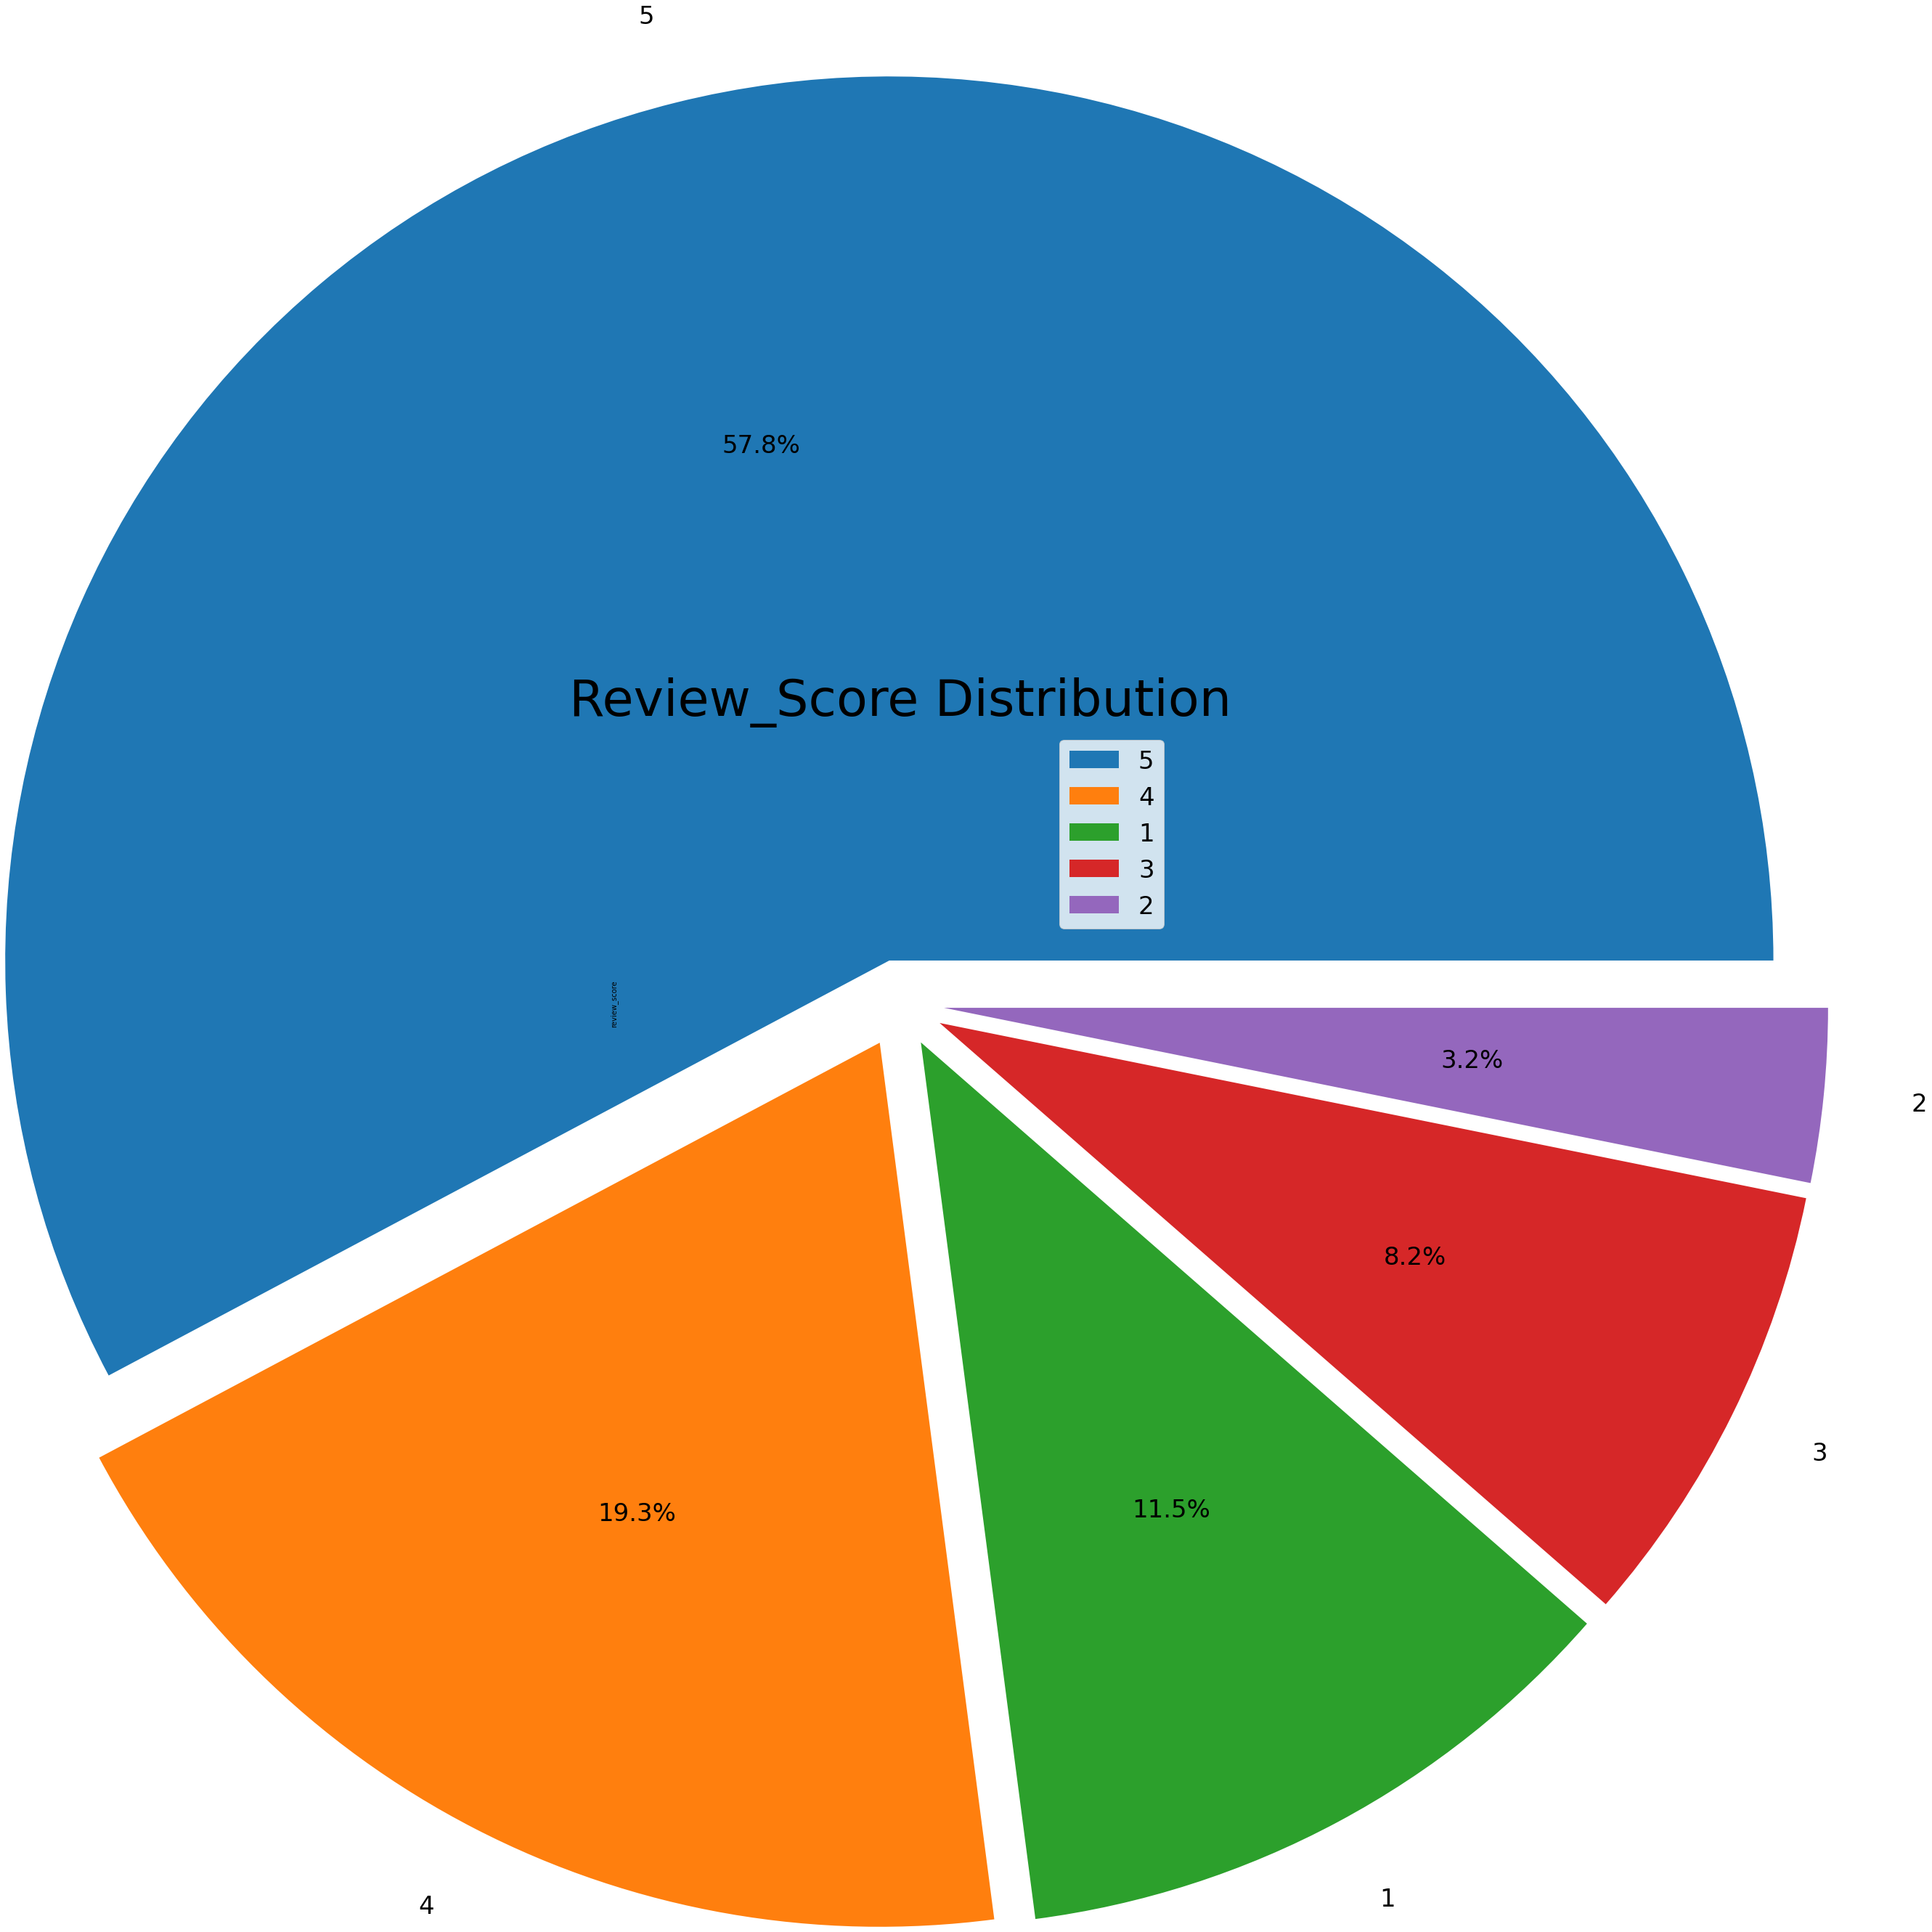

In [28]:
order_reviews.review_score.value_counts().plot(kind = 'pie',figsize=(14,14),radius=4,fontsize=34,autopct='%.1f%%',explode=[0.2]*5)
plt.legend(fontsize=34)
plt.title('Review_Score Distribution',fontsize=70)

In [29]:
#how many null/missing entries are present
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# order_status


Text(0.5, 1.0, 'Distribution of Order Status')

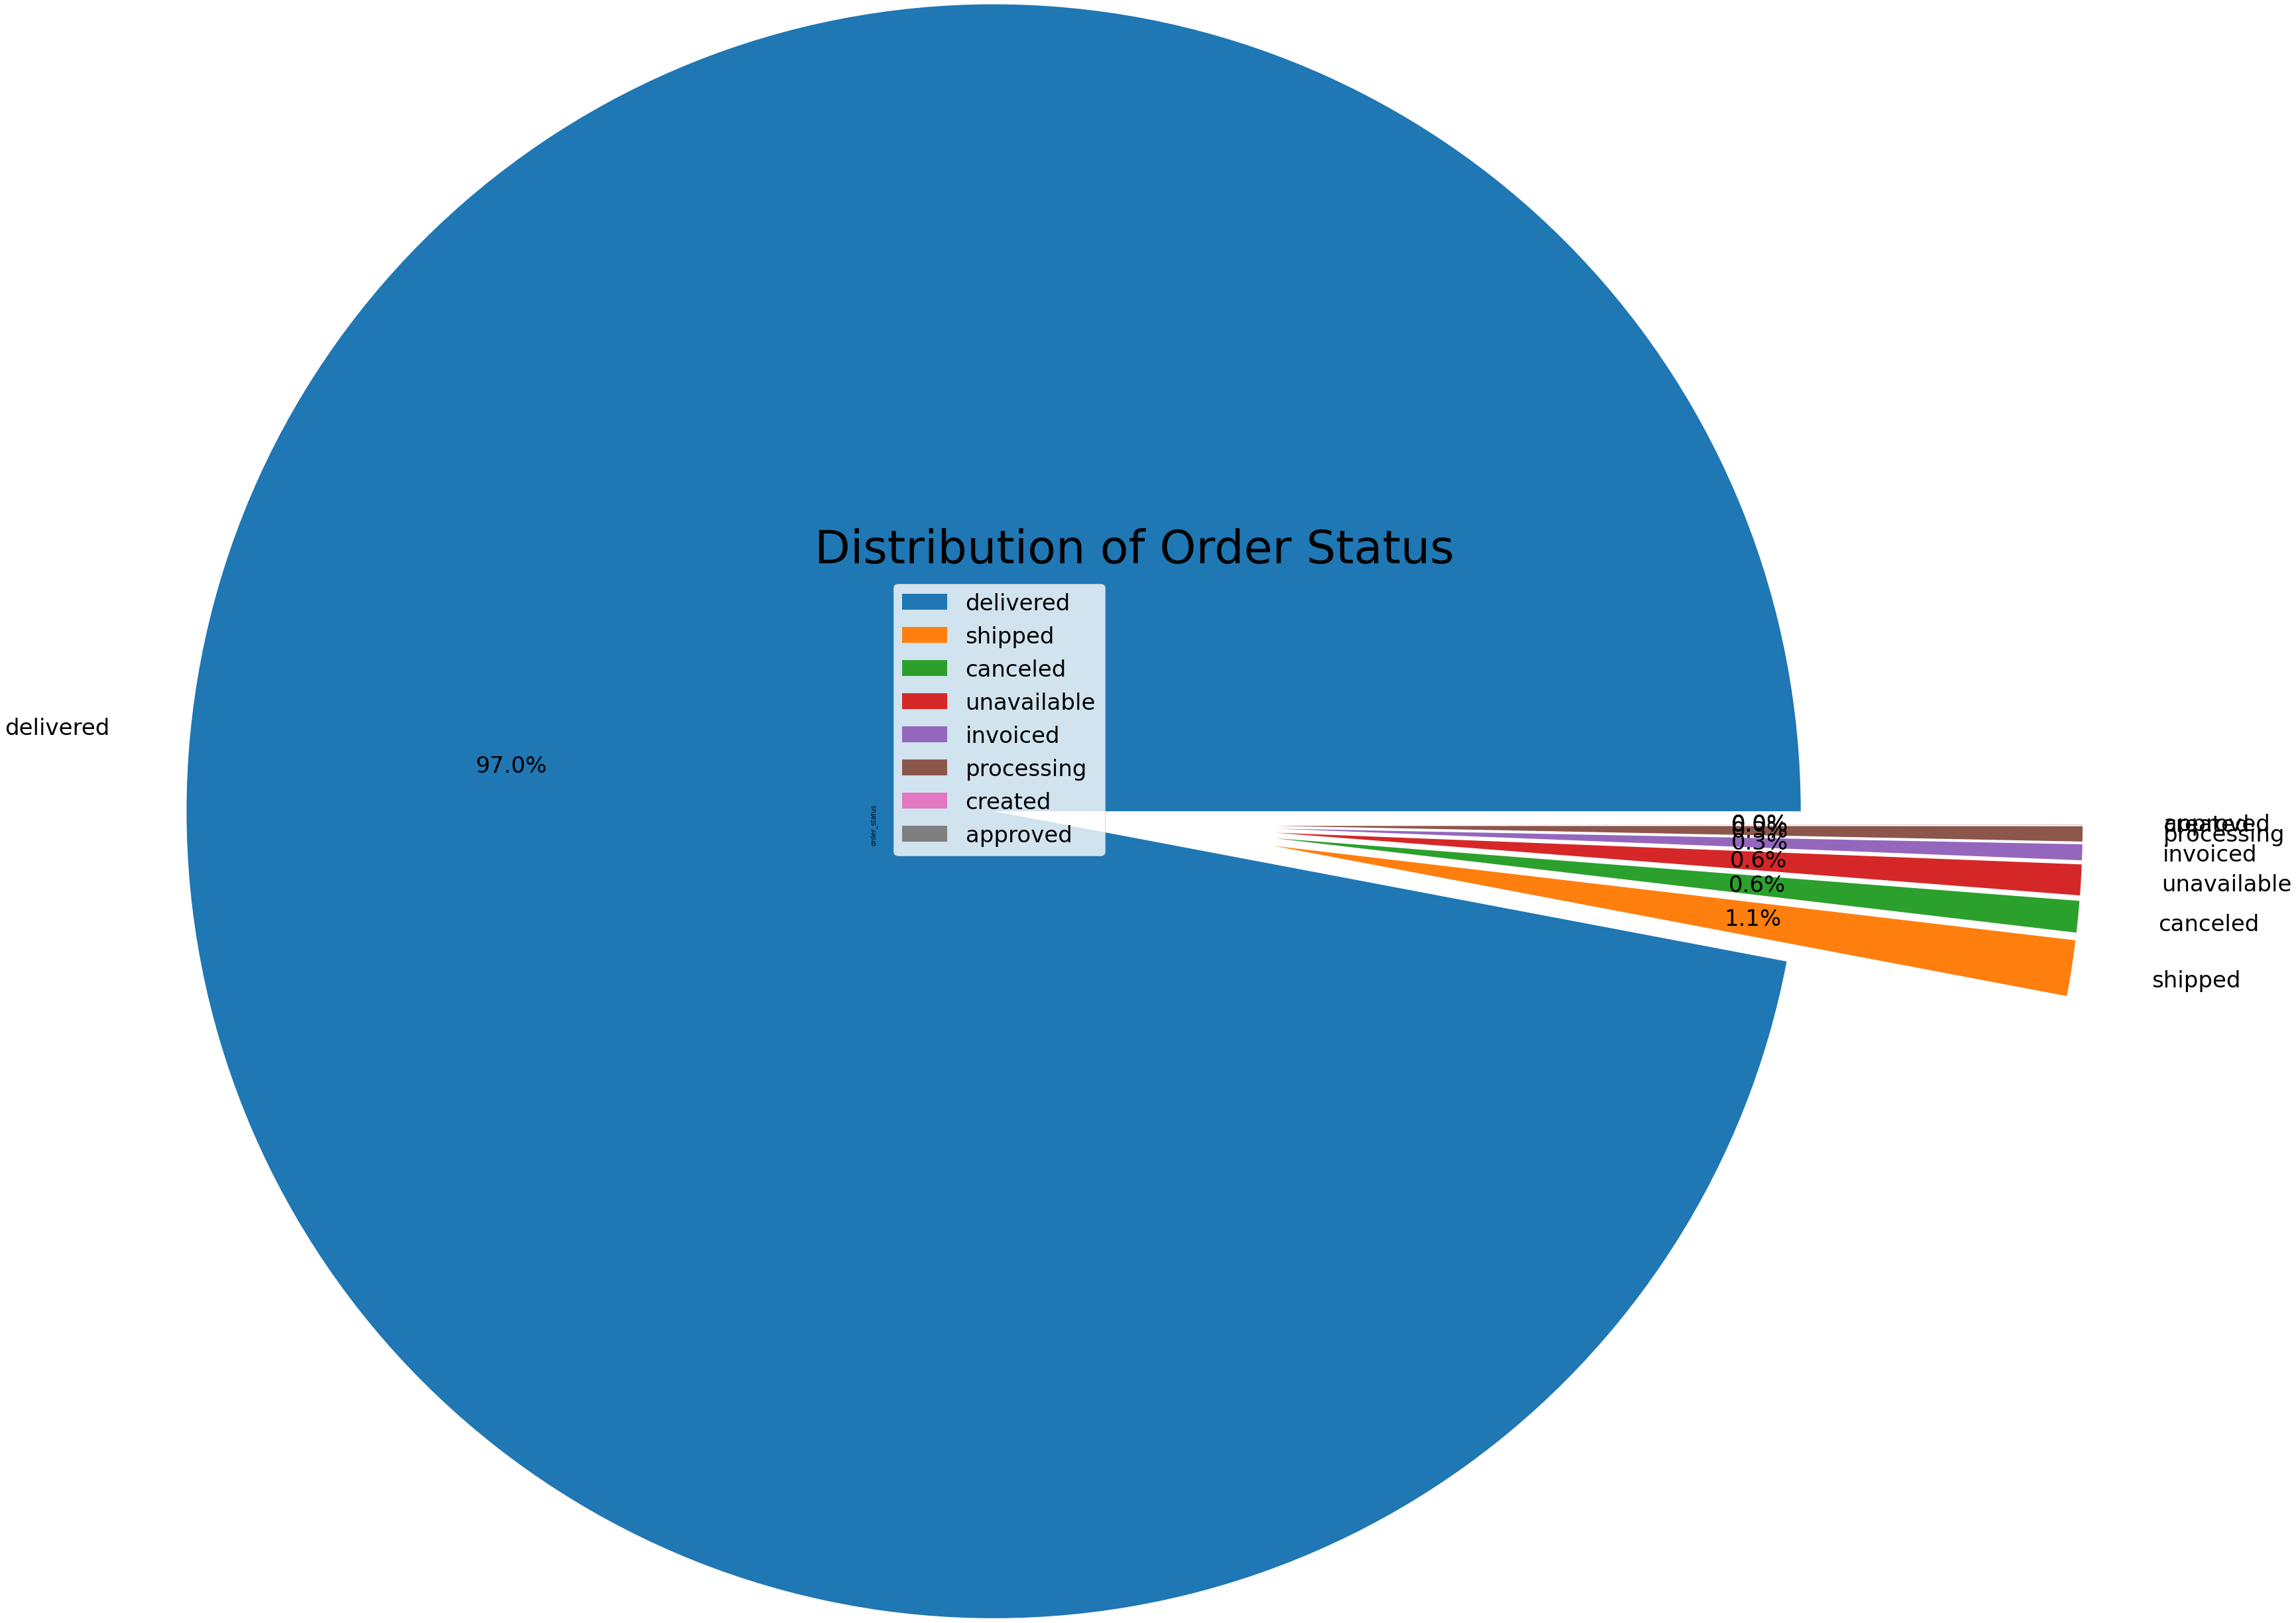

In [31]:
order_data.order_status.value_counts().plot(kind='pie',figsize=(14,14),radius=4,fontsize=34,autopct='%.1f%%',explode=[0.7]*8)
plt.legend(fontsize=34)
plt.title('Distribution of Order Status',fontsize=70)


In [32]:
#checking if any null/NA present in any entry
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# Products Data

In [33]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
products_data.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

# product_description_length vs product_name_length

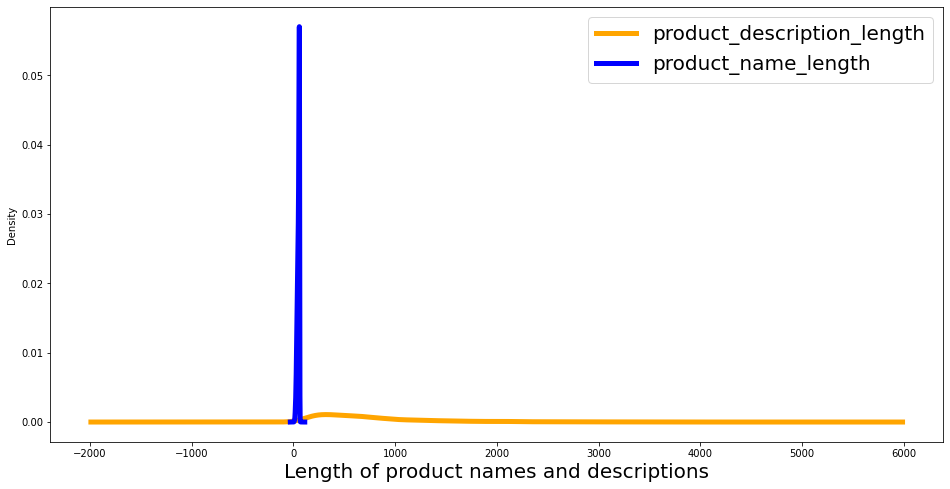

In [44]:
#Density plot of product_description_length and 
products_data.product_description_length.plot(lw=5,kind='density',figsize=(16,8),color= 'orange')
plt.xlabel('product_description_length')

#Density plot of product_description_length
d = products_data.product_name_length
d.plot(kind='kde',figsize=(16,8),color= 'blue',lw=5)
plt.xlabel('Length of product names and descriptions', fontsize=20)
plt.legend(fontsize=20)

# PDF and CDF for product description length

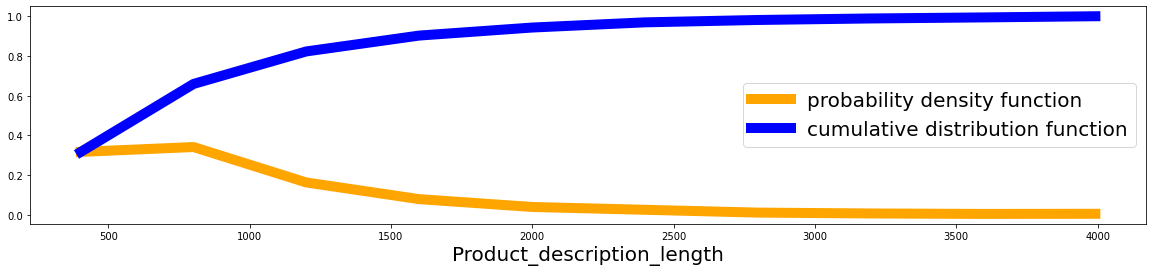

In [42]:
counts, bin_edges = np.histogram(products_data.product_description_length.dropna(), bins=10, 
                                 density = True)
#fig,ax = plt.subplots(1,2,figsize=(16,6))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.figure(figsize=(20,4))

plt.plot(bin_edges[1:],pdf,color='orange',label='probability density function',lw=10)
plt.plot(bin_edges[1:], cdf,color= 'b',label="cumulative distribution function",lw=10)
plt.xlabel('Product_description_length',fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Sellers Data

In [37]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# top 10  seller state


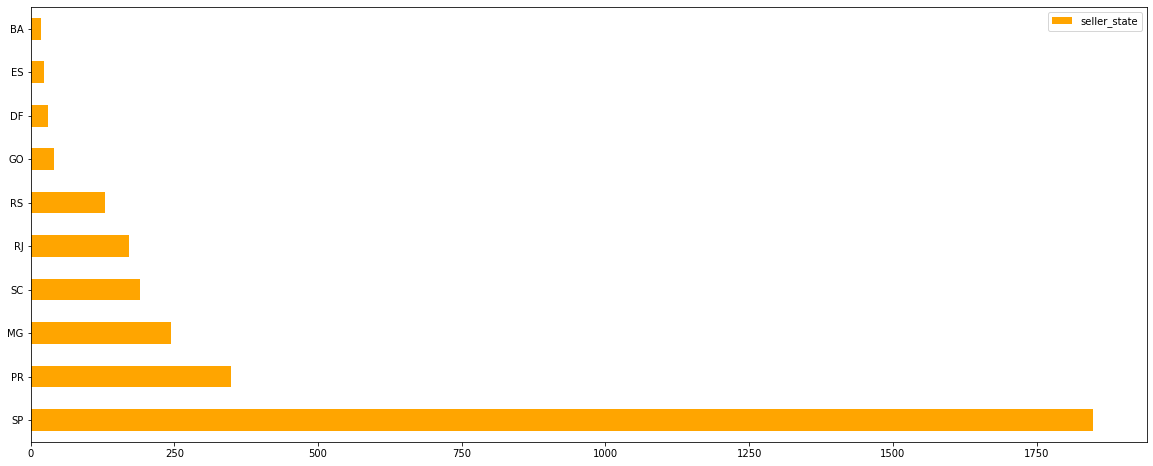

In [38]:
sellers_data.seller_state.value_counts().sort_values(ascending=False)[:10].plot(kind='barh',color='orange',figsize=(20,8))
plt.legend()
plt.show()

In [29]:
#unique sellers
print('Number of unique sellers are: ',sellers_data.seller_id.unique().shape[0])

Number of unique sellers are:  3095


# 4. Merging,Checking Missing,and Preprocessing

# renaming the zip_code_prefix 


In [30]:

geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

# keeping the unique zip code prefix to join tables


In [31]:
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

# merging customer related data


In [32]:

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(103677, 26)

# merging seller related data


In [ ]:

B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

# merging customer & seller based data


In [ ]:

data = pd.merge(A,B,on='order_id')
data.shape

# Check final data columns


In [ ]:
data.columns

# Check the 'null' values for each column

In [ ]:
data.isnull().sum()

In [ ]:
print(data.shape[0])
data[data['order_status'] != 'delivered'].shape[0]

100 - round((2514/112863)*100,3)

# Drop less useful info


In [ ]:
#removing some mis filled data
data = data[data['geolocation_state_y'] == data['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)




# Removing all NULL values

In [ ]:
prev_size = data.shape[0]
data.dropna(how='any',inplace=True)

current_size = data.shape[0]
#no Null values now
data.isnull().values.any()
print(data.shape)
print('Only {}% of data got removed'.format(round(((prev_size - current_size)/prev_size)*100,2)))

In [ ]:
data.columns

# 5. Correlations

In [ ]:
plt.scatter(data['price'], data['freight_value'],color='orange',alpha=0.3)
plt.scatter(data['price'], data['payment_value'],alpha=0.3)

plt.title("Payment value (blue) and freight cost (orange)")
plt.ylabel("Freight cost (red), Payment (blue)")
plt.xlabel("Item price")

plt.scatter(data['order_purchase_timestamp'], data['product_description_length'])
plt.title("relationship between description length and sold items")
plt.ylabel("Description length")
plt.xlabel("Quantity sold")

In [ ]:
#understanding the growth of Olist as an ecommerce company from the range of data given to us
import matplotlib.patches as mpatches
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
monthly_sales_data = data.groupby(data['order_purchase_timestamp'].dt.strftime('%m,%y'))['price'].sum().plot(kind='bar',figsize = (20,8),color=['orange','b'],width=0.8)
plt.ylabel('sales')

red_patch = mpatches.Patch(color='orange', label='2017')
green_patch = mpatches.Patch(color='blue', label='2018')
plt.legend(handles=[red_patch,green_patch])
plt.xlabel('Month,year')
plt.show()

# Top 10 states by orders

In [ ]:
data.groupby(data['customer_state'])['order_purchase_timestamp'].count().sort_values()[:10].plot(kind='barh',figsize=(20,8),color='blue')
plt.legend()
plt.show()

In [ ]:
print('Total unique category are ',data.product_category_name.unique().shape[0])

# Top 20 categories by rating


In [ ]:
data.groupby(data['product_category_name'])['price'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(20,8))
plt.legend()
plt.show()

# price by review score


In [ ]:
plt.figure(figsize= (24,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.title('Boxplots of Review Scores by Price', fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Review Score',fontsize=20)

#  Payment by review score


In [ ]:
plt.figure(figsize= (24,8))
sns.violinplot(x='review_score',y='payment_type', data=data)
plt.title('Boxplots of Review Scores by Payment Type', fontsize=20)
plt.ylabel('Payment Type',fontsize=20)
plt.xlabel('Review Score',fontsize=20)

d = data[['product_description_length','product_name_length','product_photos_qty','product_category_name','payment_type','review_score']]
sns.set_style("whitegrid");
sns.pairplot(d, hue="payment_type", height=4);
plt.show()

In [ ]:
d = data.groupby(data['product_photos_qty'].astype(int))['order_purchase_timestamp'].count()
d.plot(kind='bar',figsize=(14,8),color='orange')
plt.title('Product_photos_qty vs. Counts of order_purchase_timestamp', fontsize=20)
plt.ylabel('order_purchase_timestamp',fontsize=20)
plt.xlabel('product_photos_qty',fontsize=20)

# product_description_length vs Scores

In [ ]:
#taking only those points which was shown in the scatter plot
d = data[(data['product_name_length'] > 40) & (data['product_name_length'] < 60) & (data['product_description_length'] < 1500)]

plt.figure(figsize=(20,8))
#box plot
sns.violinplot(x='review_score',y='product_description_length', data=d)
plt.show()

# Score by State

In [ ]:
plt.figure(figsize=(20,18))
sns.violinplot(x='review_score',y='customer_state', data=d)
plt.show()

In [ ]:
plt.figure(figsize=(20,14))

#plt.suptitle('CUSTOMER State Distributions', fontsize=22)
plt.subplot(211)
g2 = sns.boxplot(x='customer_state', y='price', 
                 data=data)
g2.set_title("Customer State by Price", fontsize=20)
g2.set_xlabel("State Name", fontsize=17)
g2.set_ylabel("Price", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
plt.subplot(212)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=data)
g3.set_title("CUSTOMER State by Freight Value", fontsize=20)
g3.set_xlabel("State Name", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.show()

# Distribution of Payment Installments

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot(data.payment_installments)
plt.show()

# 6. Feature Engineering

# converting the timestamp to date

In [ ]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date

type(data['order_delivered_customer_date'][0])

# New time features


In [ ]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
data['delivery_days'] = data['order_delivered_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['ships_in'] = data['shipping_limit_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

# converting type to int


In [ ]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.replace(" days","").astype(int)
data['estimated_days'] = data['estimated_days'].str.replace(" days","").astype(int)
data['ships_in'] = data['ships_in'].str.replace(" days","").astype(int)
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

In [ ]:
sns.FacetGrid(data, hue="arrival_time", height=6) \
   .map(sns.countplot, 'review_score') \
   .add_legend()

In [ ]:
data.arrival_time.value_counts()

# dropping delivery outliers (over 60 days)

In [ ]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) | (data['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)

# grouping delivery times¶


In [ ]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()
ship_days = data.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')

#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks
data['ship_impression'] = shipping_feedback

In [ ]:
df_plot = data.groupby(['delivery_impression', 'review_score']).size().reset_index().pivot(columns='delivery_impression', index='review_score', values=0)
df_plot.plot(kind='bar',stacked=True,figsize=(20,8))
plt.title('Score by delivery',fontsize=20)
plt.xlabel('review_score',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.legend(fontsize=18)

In [ ]:
est_days = data.ship_impression.values.tolist()
review_score = data.review_score.values
fig = plt.figure(figsize=(24,8))
sns.countplot(est_days,hue=review_score,palette='coolwarm')
plt.title('Distribution of Scores by Delivery',fontsize=20)
plt.xlabel('Delivery',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.legend(fontsize=18)

# finding customers who made multiple product purchases

**Customer_ID **

In [ ]:
from collections import Counter
order_counts = [k for k,v in Counter(data.customer_unique_id).items() if v > 1]  #unique id
existing_cust = []
for i in data.customer_unique_id.values:                 
    if i in order_counts: existing_cust.append(1)   # 1 for unique ID
    else: existing_cust.append(0)                  # 0 for repeat ID

In [ ]:
len(existing_cust) # total of unique and repeat ID

In [ ]:
existing_cust.count(1) # 1 for unique ID


In [ ]:
existing_cust[-20:-1]


# seller popularity based on number of orders

In [ ]:
#seller popularity based on number of orders for each seller
max_value_count = data.seller_id.value_counts().max()
seller = data.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in data.seller_id.values:
    seller_popularity.append(seller[_id])
data['seller_popularity'] = seller_popularity
data.shape

# dropping all id based features


In [ ]:
data.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

#adding exisitng customer and seller_ID feature

data['existing_cust'] = existing_cust
data.shape

In [ ]:
data.describe()

In [ ]:
data1=data

In [ ]:
data1['satisfy']=data1['review_score'].map(lambda x: 1 if x>4 else 0)
data1['satisfy'].describe()
sns.countplot(data1['satisfy'])

In [ ]:
data.drop('satisfy',axis=1,inplace=True)


# Satisfication threshold

In [ ]:

data.loc[data['review_score'] < 4 ,'Score'] = 0
data.loc[data['review_score'] > 4,'Score'] = 1
#removing neutral reviews
data.drop(data[data['review_score'] == 4].index,inplace=True)
data.drop('review_score',axis=1,inplace=True)
print(data.shape)

In [ ]:
data.describe()

In [ ]:
sns.countplot(data.Score)

# removing some datetime features for now


In [ ]:
data.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)
data.to_csv('preprocessed_data.csv',index=False)

In [ ]:
print(data.shape)
print('Final set of features are : ')
data.columns

# 7. Modelling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('preprocessed_data.csv')
data.columns

In [ ]:
data.shape

# spliting data to train and test data

In [ ]:
#spliting data to train and test data
X = data.drop('Score',axis=1)
Y = data.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# scaling numerical features

In [ ]:
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))


#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

# Transforming Categorical features

In [ ]:
#initialising oneHotEncoder

countvec = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = countvec.fit_transform(X_train.payment_type.values)
payment_type_test = countvec.transform(X_test.payment_type.values)


#customer_state
customer_state_train = countvec.fit_transform(X_train.customer_state.values)
customer_state_test = countvec.transform(X_test.customer_state.values)

#seller_state
seller_state_train = countvec.fit_transform(X_train.seller_state.values)
seller_state_test = countvec.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = countvec.fit_transform(X_train.product_category_name.values)
product_category_name_test = countvec.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = countvec.fit_transform(X_train.arrival_time.values)
arrival_time_test = countvec.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = countvec.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = countvec.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = countvec.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = countvec.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = countvec.fit_transform(X_train.ship_impression.values)
ship_impression_test = countvec.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

# Stacking the encoded features

In [ ]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

In [ ]:
sns.heatmap(X_train.corr())

# Naive Bayes

In [ ]:
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1]}#,10,100,1000]}

#for the bow based model
NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)

In [ ]:
NB.best_params_

In [ ]:
clf = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Naive Bayes')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('Naive Bayes')


In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# Logistic Regression

In [ ]:
#we have used max_iter 1000 as it was causing exception while fitting
Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1]}#,10,20,30]} inverse of the regularization strength

#for the bow based model
LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

In [ ]:
LR.best_params_

**NOTE**

* For performance measurement we will not use accuracy as a metric as the data set is highly imbalanced.
* We will use AUC score and f1 score as performance metric.

In [ ]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

In [ ]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('Logistic Regression')


In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# Decision Tree with class_weight='balanced'

In [ ]:
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10],#,15,20], 
         'min_samples_split': [5, 10, 100]}#, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

In [ ]:
#best params
DT.best_params_

In [ ]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Decision Tree')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('Decision Tree')


In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# Random Forest with class_weight='balanced'

In [ ]:
#param grid
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10],#,30,50,100],
         'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

In [ ]:
RF.best_params_

In [ ]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('Random Forest')


In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# Gradient Boost

In [ ]:
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30],
         'max_depth' : [3,5,7,8]}

GBclf = GradientBoostingClassifier()

clf = GridSearchCV(RFclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

In [ ]:
#best parameters, 5/8 for RF
clf.best_params_

In [ ]:
import pickle

In [ ]:
#Model
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Gradient Boost')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('Gradient Boost')


In [ ]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

In [ ]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# XGB

In [ ]:
from xgboost import XGBClassifier

#Model
clf = XGBClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='orange',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
#plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Gradient Boost')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [ ]:
#plot confusion matrix
plt.figure(figsize=(14,6))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='coolwarm')
plt.title('XGBoost')
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

# Results

In [ ]:
metric = ['F1_score', " AUC_score "," Accuracy "]

df_results=pd.DataFrame(metric)
df_results['Logistic Regression']=['0.85','0.68','0.76']
df_results['Naive Bayes']=[ '0.78','0.67','0.69']
df_results['DecisionTree']=['0.77','0.68','0.68']
df_results['Random Forest']=['0.81','0.68','0.72',]
df_results['GBoost']=['0.86','0.71','0.77']
df_results['XGBoost']=['0.85','0.72','0.77']

df_results

In [ ]:
df_results.style.highlight_min()

In [ ]:
df1=df_results.iloc[:,:] #  rows, columns 
df1

In [ ]:
df1.style.highlight_max(color='red').highlight_min(color='green')

# References:

https://www.kaggle.com/code/souravbarik/customer-satisfaction-using-olist-dataset


https://github.com/praveen-hegde/E-commerce-customer-satisfaction-predicton




https://www.kaggle.com/code/alpamys/rfm-cohort-analysis